In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

In [2]:
netflix_data=pd.read_csv('./data/Netflix_titles.csv')
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [3]:
# pre- processing
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [4]:
netflix_data.fillna('Unknown', inplace=True)

Text(0, 0.5, '')

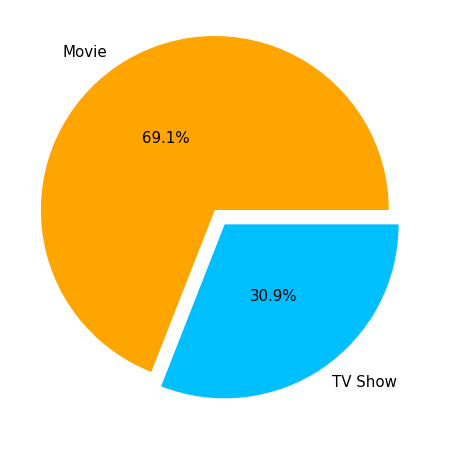

In [5]:
maincolors = ["orange", "deepskyblue"]

pie_df = netflix_data.groupby('type', axis=0).count()
pie_df['title'].plot(kind='pie',
                     figsize=(8,8),
                     autopct='%1.1f%%',
                     pctdistance=0.5,
                     explode=(0.1,0),
                     fontsize=15,
                     colors=maincolors,
                     labels=["Movie", "TV Show"])
plt.ylabel("")

In [6]:
# groupby: country, show 20th largest
bar_conti=netflix_data.groupby('country').count()
bar_df=bar_conti.nlargest(20, 'show_id')

Text(0, 0.5, 'Number of Country')

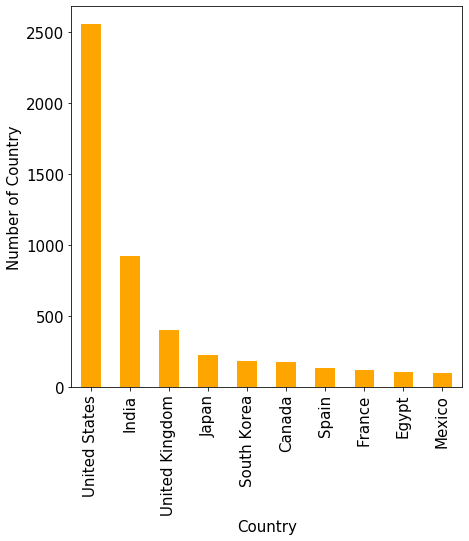

In [7]:
bar_df = bar_df.drop(['Unknown'])
bar_df["title"][:10].plot(kind='bar',
                     figsize=(7,7),
                     color = maincolors[0],
                     fontsize=15)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Number of Country", fontsize=15)

In [8]:
netflix_data.set_index('title', inplace=True)

In [9]:
movie_data = netflix_data.loc[netflix_data['type'] == 'Movie']
movie_data
tvShow_data = netflix_data.loc[netflix_data['type'] == 'TV Show']
tvShow_data

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,,
3%,s1,TV Show,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
46,s6,TV Show,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
1983,s12,TV Show,Unknown,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
1994,s13,TV Show,Diego Enrique Osorno,Unknown,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
Feb-09,s17,TV Show,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Unknown,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...,...,...
Zindagi Gulzar Hai,s7768,TV Show,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
Zoids Wild,s7776,TV Show,Unknown,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
Zombie Dumb,s7778,TV Show,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


In [10]:
imdb_rating =pd.read_csv('./data/IMDb_ratings.csv')
imdb_movie =pd.read_csv('./data/IMDb_movies.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [11]:
imdb_data = pd.DataFrame({
    'Title':imdb_movie.title,
    'Rating': imdb_rating.weighted_average_vote,
    'Genre':imdb_movie.genre})


In [12]:
imdb_data.drop_duplicates(subset=['Title'], inplace=True)
imdb_data.dropna(inplace=True)


In [14]:
joint_data=imdb_data.merge(netflix_data,left_on='Title',right_on='title',how='inner')
joint_data = joint_data.sort_values(by='Rating', ascending=False) 
joint_data['release_year'] = joint_data['release_year'].astype('int64', copy=False)
joint_data = joint_data[joint_data['release_year'] > 2015] 

In [31]:
ranking_data = joint_data[:10][["Title", "Rating", "Genre", "director"]]
ranking_data.index = np.arange(1, len(ranking_data) + 1)

'Ani... Dr. Kashinath Ghanekar'

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from collections import Counter
import re

In [17]:
data_g = joint_data['listed_in'][:1000]
total_g = []
for i in data_g:
    movie_g = i.split(",")
    word_g = []
    for j in movie_g:
        tem = j.replace(' ', '')
        if "Movies" in tem:
            tem = tem.replace('Movies', '')
        if "Dramas" in tem:
            tem = tem.replace('Dramas', '')
        if "TV" in tem:
            tem = tem.replace('TV', '')
        if tem: # check is not empty
            total_g.append(tem)

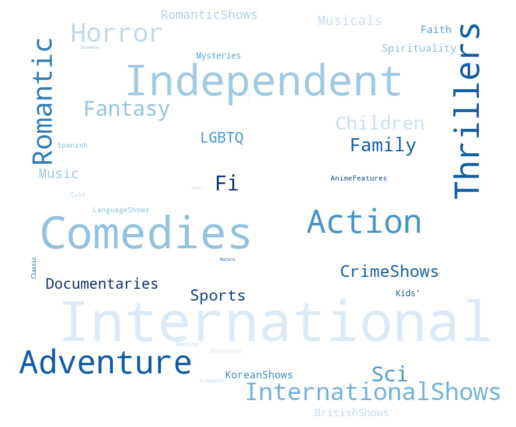

In [18]:
def listToString(s):  
    text = " " 
    text = text.join(s)
    return text 

text = listToString(list(total_g))
plt.rcParams['figure.figsize'] = (9, 12)

mask = np.array(Image.open('./asset/bg.png'))
# Start From here , colormap
wordcloud = WordCloud(max_words=1000000,background_color="white", colormap="Blues",mask=mask, collocations=False).generate(text)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

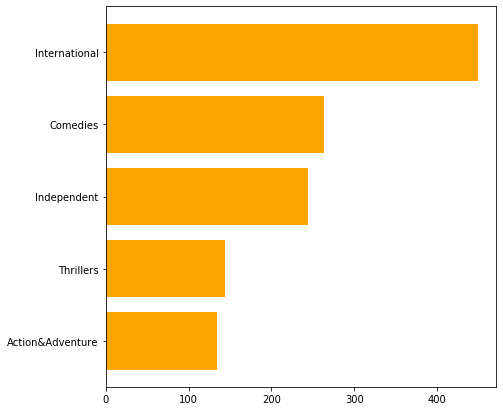

In [19]:
sum_g = Counter(total_g)
g = {k : v for k, v in sorted(sum_g.items(), key= lambda item: item[1], reverse= True)}

x = list(g.keys())[:5][::-1]
y = list(g.values())[:5][::-1]
plt.figure(figsize=(7,7))
plt.barh(x, y, color = maincolors[0])
plt.show()

In [20]:
# handle movie duration data
duration_date = []
x_data = list(range(10, 410, 10))
count_data = np.zeros(40)

for i in movie_data['duration']:
    tem = int(re.search(r'\d+', i).group()) # grab integer(min) from string 
    duration_date.append(tem)
    index = int((tem/10)-1)
    count_data[index] = count_data[index] +1

Text(0.5, 1.0, 'Duration')

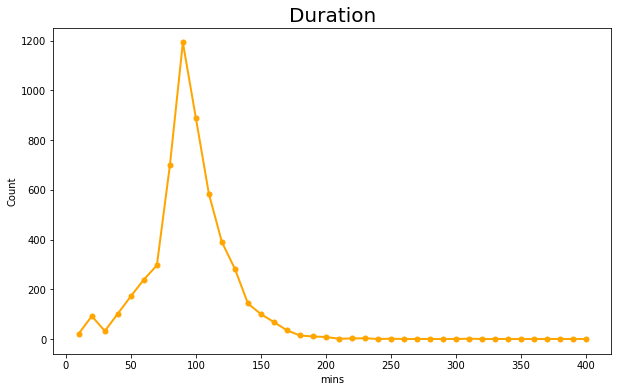

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x_data, count_data, color=maincolors[0], marker='o', linestyle='solid', linewidth=2, markersize=5)
ax.set_xlabel("mins")
ax.set_ylabel("Count")
ax.set_title("Duration", fontsize=20)

In [22]:
# recommendation 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# TFIDF algorithm
tfidf = TfidfVectorizer()
netflix_data['description'] = netflix_data['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix_data['description'])
tfidf_matrix.shape
# tfidf.get_feature_names()

(7787, 18168)

In [23]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.02948333, 0.05984564, ..., 0.02614326, 0.01125591,
        0.02705265],
       [0.02948333, 1.        , 0.00690474, ..., 0.09719377, 0.        ,
        0.        ],
       [0.05984564, 0.00690474, 1.        , ..., 0.00361798, 0.01299716,
        0.01137338],
       ...,
       [0.02614326, 0.09719377, 0.00361798, ..., 1.        , 0.01869832,
        0.06912328],
       [0.01125591, 0.        , 0.01299716, ..., 0.01869832, 1.        ,
        0.01724366],
       [0.02705265, 0.        , 0.01137338, ..., 0.06912328, 0.01724366,
        1.        ]])

In [25]:
x = list(range(0, len(netflix_data.index)))
indices = pd.Series(x, index=netflix_data.index).drop_duplicates()

title
3%                                            0
7:19                                          1
23:59                                         2
9                                             3
21                                            4
                                           ... 
Zozo                                       7782
Zubaan                                     7783
Zulu Man in Japan                          7784
Zumbo's Just Desserts                      7785
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    7786
Length: 7787, dtype: int64

In [26]:
# total 7787 Movies
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data.iloc[movie_indices]

In [34]:
get_recommendations('Friends')

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,,
BoJack Horseman,s1026,TV Show,Unknown,"Will Arnett, Aaron Paul, Amy Sedaris, Alison B...",United States,"October 25, 2019",2020,TV-MA,6 Seasons,TV Comedies,Meet the most beloved sitcom horse of the '90s...
Dad's Army,s1578,TV Show,Unknown,"Arthur Lowe, John Le Mesurier, Clive Dunn, Joh...",United Kingdom,"March 31, 2018",1977,TV-PG,10 Seasons,"British TV Shows, Classic & Cult TV, TV Comedies",This beloved sitcom follows the unlikely heroe...
Warehoused,s7483,Movie,Jack Zagha Kababie,"José Carlos Ruiz, Hoze Meléndez",Mexico,"November 1, 2017",2015,TV-14,92 min,"Comedies, Dramas, International Movies",A soon-to-be-retiring Mr. Lino teaches 20-some...
Studio 54,s5861,Movie,Matt Tyrnauer,Unknown,United States,"February 16, 2019",2018,TV-MA,99 min,Documentaries,This documentary follows the rapid rise and fa...
Single Ladies Senior,s5630,TV Show,Unknown,"Summer Meng, Christina Mok, Alina Cheng, Bonni...",Unknown,"December 22, 2018",2018,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Four best friends and spirited career women na...
